# 1. Visualize the data

First, load 3D image data of T1 and T2 brain scans in [NIfTI](https://nifti.nimh.nih.gov/nifti-1/) (.nii.gz) format using `nibabel`

In [1]:
impath = 'small'
import os
import glob

t1_filenames = glob.glob(os.path.join(impath, 't1', '*'))
t2_filenames = glob.glob(os.path.join(impath, 't2', '*'))

We can see that our data folder contains T1 and T2 images with the same number of images, which paired by using identical prefixes of the format `IXI<NNN>-HH-<NNNN>-T1` and `IXI<NNN>-HH-<NNNN>-T2`

In [2]:
for i in zip(t1_filenames, t2_filenames):
    print(i[0], '\t', i[1])

small\t1\IXI102-HH-1416-T1_fcm.nii.gz 	 small\t2\IXI102-HH-1416-T2_reg_fcm.nii.gz
small\t1\IXI104-HH-1450-T1_fcm.nii.gz 	 small\t2\IXI104-HH-1450-T2_reg_fcm.nii.gz
small\t1\IXI105-HH-1471-T1_fcm.nii.gz 	 small\t2\IXI105-HH-1471-T2_reg_fcm.nii.gz
small\t1\IXI126-HH-1437-T1_fcm.nii.gz 	 small\t2\IXI126-HH-1437-T2_reg_fcm.nii.gz
small\t1\IXI127-HH-1451-T1_fcm.nii.gz 	 small\t2\IXI127-HH-1451-T2_reg_fcm.nii.gz
small\t1\IXI128-HH-1470-T1_fcm.nii.gz 	 small\t2\IXI128-HH-1470-T2_reg_fcm.nii.gz
small\t1\IXI130-HH-1528-T1_fcm.nii.gz 	 small\t2\IXI130-HH-1528-T2_reg_fcm.nii.gz
small\t1\IXI131-HH-1527-T1_fcm.nii.gz 	 small\t2\IXI131-HH-1527-T2_reg_fcm.nii.gz
small\t1\IXI132-HH-1415-T1_fcm.nii.gz 	 small\t2\IXI132-HH-1415-T2_reg_fcm.nii.gz
small\t1\IXI136-HH-1452-T1_fcm.nii.gz 	 small\t2\IXI136-HH-1452-T2_reg_fcm.nii.gz
small\t1\IXI137-HH-1472-T1_fcm.nii.gz 	 small\t2\IXI137-HH-1472-T2_reg_fcm.nii.gz
small\t1\IXI146-HH-1389-T1_fcm.nii.gz 	 small\t2\IXI146-HH-1389-T2_reg_fcm.nii.gz
small\t1\IXI148-

Now, we can load the data in `numpy` format for any particular pair of files using `nibabel`

In [3]:
import nibabel as nib
image_t1 = nib.load(t1_filenames[0])
image_t2 = nib.load(t2_filenames[0])
image_data_t1 = image_t1.get_fdata()
image_data_t2 = image_t2.get_fdata()

Check that data was read

In [4]:
image_data_t1

array([[[ 1.82256736e-15, -2.91517993e-15, -2.79302444e-16, ...,
         -1.21815994e-18,  8.20114505e-18, -5.60198369e-15],
        [-6.08088840e-12, -3.03916354e-12,  1.35756445e-12, ...,
         -8.00827404e-09, -1.46866284e-07,  1.10362259e-06],
        [-1.74909073e-10, -8.77406897e-11,  4.26164035e-11, ...,
         -2.30348519e-07, -4.22442508e-06,  3.17438535e-05],
        ...,
        [-2.04027655e-18, -5.25780085e-16, -5.23933178e-14, ...,
          1.19221740e-16, -8.78467068e-17,  1.80079959e-16],
        [-9.91648675e-20, -1.17442245e-14,  8.97798478e-14, ...,
          3.97517318e-18,  1.79747816e-16, -9.89375987e-16],
        [-4.36462931e-22, -7.16403096e-18,  3.15343008e-16, ...,
          1.85609184e-20,  6.41381423e-19, -3.23097843e-18]],

       [[-1.19115575e-15, -8.32124842e-13,  9.62148004e-13, ...,
         -6.99597929e-19, -2.18432162e-17,  1.15145808e-17],
        [ 4.69371542e-10,  5.68497626e-07, -5.70835027e-07, ...,
          1.53182356e-07,  5.28522264e

Check that array is 3-dimensional with `120x120x90` resolution

In [5]:
image_data_t1.shape

(120, 120, 90)

How do we visualize 3D iimage (array) in JupyterLab? First thing to try is `matplotlib`. Let's create 2D slices and print them on screen

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

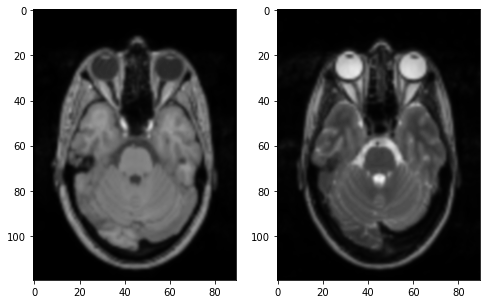

In [8]:
# Slice index
sl = 60   #Range: 0-119

fig=plt.figure(figsize=(8, 8))

fig.add_subplot(1, 2, 1)
plt.imshow(image_data_t1[:,sl,:], cmap="gist_gray", interpolation="bicubic")

fig.add_subplot(1, 2, 2)
plt.imshow(image_data_t2[:,sl,:], cmap="gist_gray", interpolation="bicubic")
    
plt.show()

Another powerful way to explore 3D arrays is `itkwidgets` which allow to visulaize 3D volumes and is often used in medical imaging

In [9]:
from itkwidgets import view

In [10]:
view(image_data_t1)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageD3; proxy o…